


# Machine Learning Tutorial prediction  of House Price

* How to deal with catergorical data
* Imputation using hypothesis testing
* Regression model
* cross validation techniques

## Dataset Description: Property Features

The dataset comprises several attributes describing different features of properties. Below is a detailed description of each attribute:

- **price**:
  - *Description*: Price of the property in thousands of dollars.
  - *Type*: Continuous numeric.

- **area**:
  - *Description*: Area of the property in square feet.
  - *Type*: Continuous numeric.

- **bedrooms**:
  - *Description*: Number of bedrooms in the property.
  - *Type*: Discrete integer.

- **bathrooms**:
  - *Description*: Number of bathrooms in the property.
  - *Type*: Discrete integer.

- **stories**:
  - *Description*: Number of stories of the property.
  - *Type*: Discrete integer.

- **mainroad**:
  - *Description*: Proximity to the main road (yes/no).
  - *Type*: Categorical (values: 'yes', 'no').

- **guestroom**:
  - *Description*: Availability of a guest room (yes/no).
  - *Type*: Categorical (values: 'yes', 'no').

- **basement**:
  - *Description*: Availability of a basement (yes/no).
  - *Type*: Categorical (values: 'yes', 'no').

- **hotwaterheating**:
  - *Description*: Availability of hot water heating (yes/no).
  - *Type*: Categorical (values: 'yes', 'no').

- **airconditioning**:
  - *Description*: Availability of air conditioning (yes/no).
  - *Type*: Categorical (values: 'yes', 'no').

- **parking**:
  - *Description*: Number of parking spots available.
  - *Type*: Discrete integer.

- **prefarea**:
  - *Description*: Preferred location of the property (yes/no).
  - *Type*: Categorical (values: 'yes', 'no').

- **furnishingstatus**:
  - *Description*: Status of furnishing in the property.
  - *Type*: Categorical (values: 'furnished', 'semi-furnished', 'unfurnished').

This dataset provides comprehensive information about various aspects of properties, including their amenities, location preferences, and furnishing status.

### our target is `price`


In [1]:
#Import necessary libary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Multivariable Regression

1.reading the data

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/Housing_Price_Data.csv')
#df=pd.read_csv(r'Housing_Price_Data.csv')
print("loading the dataset....")
df.head()

loading the dataset....


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


2.Data Preprocessing

###### the distribution of Price as the Our Dependant value

<ipython-input-6-dc60ab6ea5ab>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,


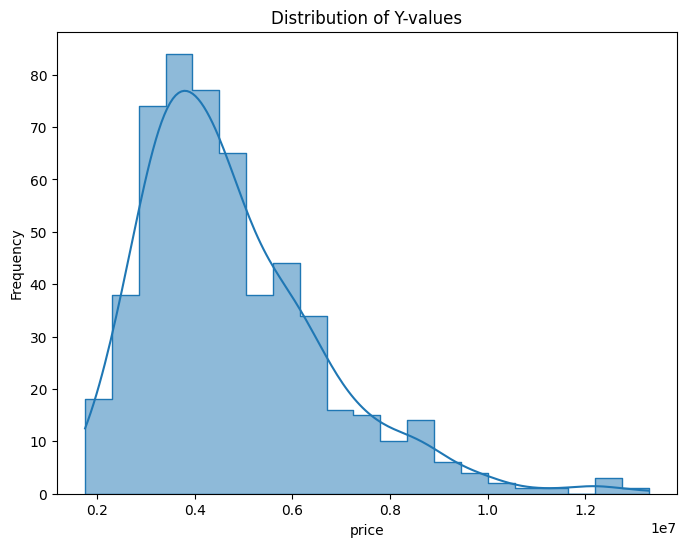

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df,
             x='price',
             element='step',
             kde=True,
             palette='tab10')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Distribution of Y-values')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [ ]:
#Displaying the columns of all df
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
#selecting the columna of non categorical variable
category_col=df.select_dtypes(include=['object']).columns
category_col

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

#### This is known as the baseline model

making imputation if  dataset has missing values

In [5]:
missing_percentage=0.1
num_missing_value=int(len(df['area'])*missing_percentage)
missing_indices = np.random.choice(len(df['area']), num_missing_value, replace=False)
df['area'][missing_indices] = np.nan

C:\Users\user\AppData\Local\Temp\ipykernel_13680\3184425301.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area'][missing_indices] = np.nan


In [6]:
df.isnull().sum()

price                0
area                54
bedrooms             0
bathrooms            0
stories              0
mainroad             0
guestroom            0
basement             0
hotwaterheating      0
airconditioning      0
parking              0
prefarea             0
furnishingstatus     0
dtype: int64

In [7]:
#calculating the the missing percentage of columns
print(f"the columns with null values and their percentage")
percentage=(df.isnull().mean()*100).round(2)
for col in df.columns:
    print(f"{col} : {percentage[col]}%")

the columns with null values and their percentage
price : 0.0%
area : 9.91%
bedrooms : 0.0%
bathrooms : 0.0%
stories : 0.0%
mainroad : 0.0%
guestroom : 0.0%
basement : 0.0%
hotwaterheating : 0.0%
airconditioning : 0.0%
parking : 0.0%
prefarea : 0.0%
furnishingstatus : 0.0%


In [8]:
#replacing the missing values with the area mean
df['area'].fillna(df['area'].mean(),inplace=True)

In [9]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Encoding

Encoding methods are used to convert categorical data into numerical format, which is often required for machine learning algorithms to process the data.

Which column should we encode or dummy?

Encode:
* mainroad
* furnishingstatus

Dummies:
* guestroom
* prefarea


In [1]:
#converting the categorical value into numerical data
col_to_encode=df.select_dtypes(include=['object']).columns
encoded_data = pd.get_dummies(df, columns=col_to_encode)
encoded_data.head(5)

NameError: name 'df' is not defined

In [11]:
#demonstarting the columns datatype
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            545 non-null    int64  
 1   area                             545 non-null    float64
 2   bedrooms                         545 non-null    int64  
 3   bathrooms                        545 non-null    int64  
 4   stories                          545 non-null    int64  
 5   parking                          545 non-null    int64  
 6   mainroad_no                      545 non-null    bool   
 7   mainroad_yes                     545 non-null    bool   
 8   guestroom_no                     545 non-null    bool   
 9   guestroom_yes                    545 non-null    bool   
 10  basement_no                      545 non-null    bool   
 11  basement_yes                     545 non-null    bool   
 12  hotwaterheating_no    

In [12]:
#converting the bool type into numeric datatype
bool_col=encoded_data.select_dtypes(include=['bool']).columns
encoded_data[bool_col]=encoded_data[bool_col].astype('int64')

In [13]:
#now all columns are in the numeric datatype[int64,float64]
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            545 non-null    int64  
 1   area                             545 non-null    float64
 2   bedrooms                         545 non-null    int64  
 3   bathrooms                        545 non-null    int64  
 4   stories                          545 non-null    int64  
 5   parking                          545 non-null    int64  
 6   mainroad_no                      545 non-null    int64  
 7   mainroad_yes                     545 non-null    int64  
 8   guestroom_no                     545 non-null    int64  
 9   guestroom_yes                    545 non-null    int64  
 10  basement_no                      545 non-null    int64  
 11  basement_yes                     545 non-null    int64  
 12  hotwaterheating_no    

In [14]:
encoded_data.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420.0,4,2,3,2,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0
1,12250000,8960.0,4,4,4,3,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
2,12250000,9960.0,3,2,2,2,0,1,1,0,...,1,1,0,1,0,0,1,0,1,0
3,12215000,7500.0,4,2,2,3,0,1,1,0,...,1,1,0,0,1,0,1,1,0,0
4,11410000,7420.0,4,1,2,2,0,1,0,1,...,1,1,0,0,1,1,0,1,0,0


To determine how the features relation on each other using `pairplot`

In [ ]:
#to demonstrate the correlation between features it will take some times to execute it

plt.figure(figsize=(15,9))
sns.pairplot(encoded_data)
plt.show()

<Figure size 1500x900 with 0 Axes>

In [15]:
correlation_matrix=encoded_data.corr()
corr=correlation_matrix['price'].drop('price')
corr.abs().sort_values(ascending=False)

area                               0.520519
bathrooms                          0.517545
airconditioning_no                 0.452954
airconditioning_yes                0.452954
stories                            0.420712
parking                            0.384394
bedrooms                           0.366494
prefarea_no                        0.329777
prefarea_yes                       0.329777
mainroad_no                        0.296898
mainroad_yes                       0.296898
furnishingstatus_unfurnished       0.280587
guestroom_yes                      0.255517
guestroom_no                       0.255517
furnishingstatus_furnished         0.229350
basement_no                        0.187057
basement_yes                       0.187057
hotwaterheating_yes                0.093073
hotwaterheating_no                 0.093073
furnishingstatus_semi-furnished    0.063656
Name: price, dtype: float64

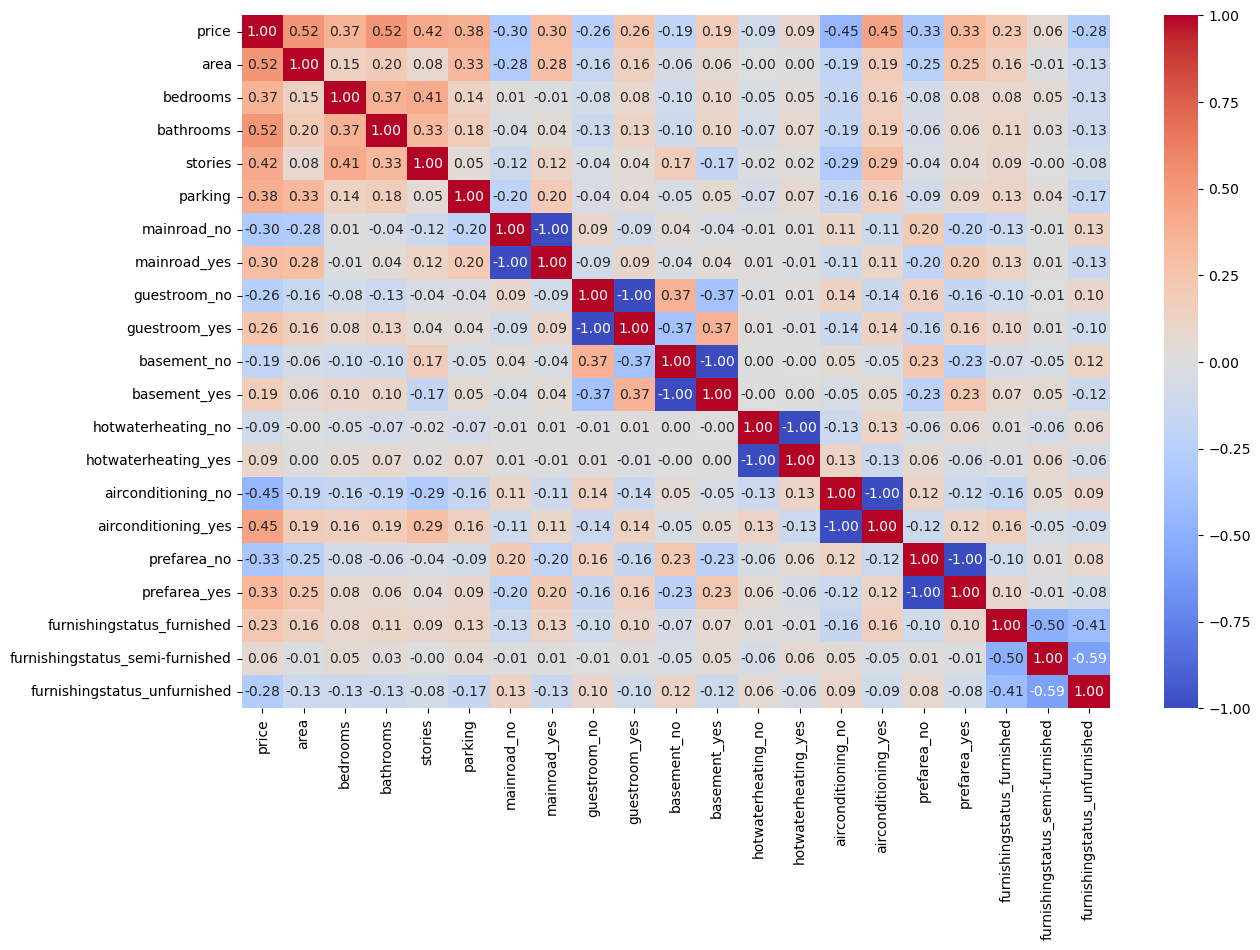

In [ ]:
plt.figure(figsize=(14,9))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()


from above you can see                          
<b>area                              
airconditioning_no
bathrooms                  
airconditioning_yes               
stories                            
parking                            
bedrooms </b>   are important features in our prediction as have high correlation coefficient with `price` as response               

 Standardization will ensure that features with different units and scales contribute equally to the model training process.

In [16]:
#separating the dataset into x and y features
from sklearn.preprocessing import StandardScaler
X = encoded_data.drop(columns=['price'])
y = encoded_data['price']  # Target variable

# # standarization of data
# scaler=StandardScaler()
# x_scaled=scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,

                                                    random_state=0)


In [97]:
#list of features
list(X.columns)


['area',
 'bedrooms',
 'bathrooms',
 'stories',
 'parking',
 'mainroad_no',
 'mainroad_yes',
 'guestroom_no',
 'guestroom_yes',
 'basement_no',
 'basement_yes',
 'hotwaterheating_no',
 'hotwaterheating_yes',
 'airconditioning_no',
 'airconditioning_yes',
 'prefarea_no',
 'prefarea_yes',
 'furnishingstatus_furnished',
 'furnishingstatus_semi-furnished',
 'furnishingstatus_unfurnished']

In [ ]:
X_train.shape,X.shape

((436, 20), (545, 20))

In [ ]:
len(X_train)/len(X)

0.8

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_preds = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE) and R-squared (R2) score
mse = mean_squared_error(y_test, y_preds)
r2 = r2_score(y_test, y_preds)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 1016046723120.4194
R-squared (R2) Score: 0.6473918736043389


In [ ]:
#demo to compare predicted vs actual values

formatted_preds = [f'{y_pred:.0f}' for y_pred in y_preds] #to remove scientific notation
pd.DataFrame({'Predicted':formatted_preds,'Actual':y_test}).head()

,Predicted,Actual
239,3992695,4585000
113,6188462,6083000
325,4496282,4007500
66,7244529,6930000
479,2747630,2940000


as you can see our prediction is not performing well

#1.Approach 1
# let's start the model by using lazypredict

In [ ]:
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyRegressor


In [ ]:
#initialize the lazyRegressor
reg = LazyRegressor()


# Fit LazyRegressor on training data
model,predictions=reg.fit(X_train,X_test,y_train,y_test)

100%|██████████| 42/42 [00:09<00:00,  4.57it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 436, number of used features: 18
[LightGBM] [Info] Start training from score 4777635.183486
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [ ]:
#printing the model and their performance

print(model)

                               Adjusted R-Squared  R-Squared         RMSE  \
Model                                                                       
PoissonRegressor                             0.60       0.67    970454.99   
LassoCV                                      0.57       0.65   1004801.76   
RidgeCV                                      0.57       0.65   1006118.51   
Ridge                                        0.57       0.65   1007785.55   
Lasso                                        0.57       0.65   1007990.76   
TransformedTargetRegressor                   0.57       0.65   1007991.43   
LinearRegression                             0.57       0.65   1007991.43   
HuberRegressor                               0.57       0.65   1009912.89   
ElasticNet                                   0.56       0.64   1013024.31   
SGDRegressor                                 0.56       0.64   1013467.92   
OrthogonalMatchingPursuitCV                  0.56       0.64   1021314.02   

<b>Using Ensemble Methods with Top Model Performers: `PoissonRegressor`, `LassoCV`, `RidgeCV`</b>
In a regression task, ensemble methods can be employed to combine the strengths of multiple models and improve overall performance. Here, we'll consider using ensemble techniques with the top model performers PoissonRegressor, LassoCV, and RidgeCV to potentially enhance predictive accuracy and robustness.

###let's use  VotingRegressor as ensemble with weights approach

In [17]:
from sklearn.linear_model import PoissonRegressor, LassoCV, RidgeCV
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize individual models
poisson_reg = PoissonRegressor()
lasso_cv = LassoCV()
ridge_cv = RidgeCV()

# Fit individual models on training data
poisson_reg.fit(X_train, y_train)
lasso_cv.fit(X_train, y_train)
ridge_cv.fit(X_train, y_train)

# Make predictions with individual models
poisson_pred = poisson_reg.predict(X_test)
lasso_pred = lasso_cv.predict(X_test)
ridge_pred = ridge_cv.predict(X_test)

# Define custom weights for VotingRegressor (adjust as needed)
weights = [0.3, 0.4, 0.3]  # Example weights summing up to 1

# Create VotingRegressor with custom weights
ensemble_reg = VotingRegressor(estimators=[
    ('poisson', poisson_reg),
    ('lasso', lasso_cv),
    ('ridge', ridge_cv)
], weights=weights)

# Fit the ensemble model on training data
ensemble_reg.fit(X_train, y_train)

# Make predictions using the weighted ensemble
ensemble_pred = ensemble_reg.predict(X_test)

# Evaluate performance (e.g., RMSE) of the weighted ensemble
ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_pred))

# Print performance metrics
print(f"Weighted Ensemble (VotingRegressor) RMSE: {ensemble_rmse}")


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_linear_loss.py:294: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights


Weighted Ensemble (VotingRegressor) RMSE: 1235860.7033514671


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_linear_loss.py:294: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights


In [18]:
#demo of predicted vs actual value
pd.DataFrame({'Predicted':ensemble_pred,'Actual':y_test}).head()

,Predicted,Actual
239,4.321849e+06,4585000
113,6.050436e+06,6083000
325,4.361331e+06,4007500
66,6.951103e+06,6930000
479,3.937026e+06,2940000


there is still improvement in our model compared to linear regression

##2.Approach of combining the the model and then compare it according to the performance

In [50]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
#import xgboost as xgb

### Name all the models as a list

### Initialise all models

In [51]:
regressor_models = [
    ("Linear Regression", LinearRegression()),
    ("Lasso Regression", Lasso()),
    ("Ridge Regression", Ridge()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor()),
    ("Gradient Boosting", GradientBoostingRegressor()),
    ("AdaBoost", AdaBoostRegressor()),
    #("XGBoost", xgb.XGBRegressor())
]

In [55]:
results = []
models = {}
for name, reg in regressor_models:
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o reg.fit(X_train, y_train)

    print ('... predicting')
    y_pred = reg.predict(X_test)

    print ('... scoring')
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)



    # save the results to dictionaries
    models[name] = reg

    results.append([name, mse, r2, run_time.best])

results = pd.DataFrame(results, columns=['Regressors', 'MSE', "R-Squared", 'Train Time'])
#results.set_index('Regressors', inplace= True)
results

Fitting Linear Regression model...
... predicting
... scoring
Fitting Lasso Regression model...
... predicting
... scoring
Fitting Ridge Regression model...
... predicting
... scoring
Fitting Decision Tree model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting Gradient Boosting model...
... predicting
... scoring
Fitting AdaBoost model...
... predicting
... scoring


,Regressors,MSE,R-Squared,Train Time
0,Linear Regression,1016046723120.42,0.65,0.01
1,Lasso Regression,1016040363084.47,0.65,0.00
2,Ridge Regression,1008332791022.37,0.65,0.00
3,Decision Tree,2349256449541.28,0.18,0.00
4,Random Forest,1222186051342.16,0.58,0.23
5,Gradient Boosting,1309722073100.19,0.55,0.08
6,AdaBoost,1559145842487.93,0.46,0.09


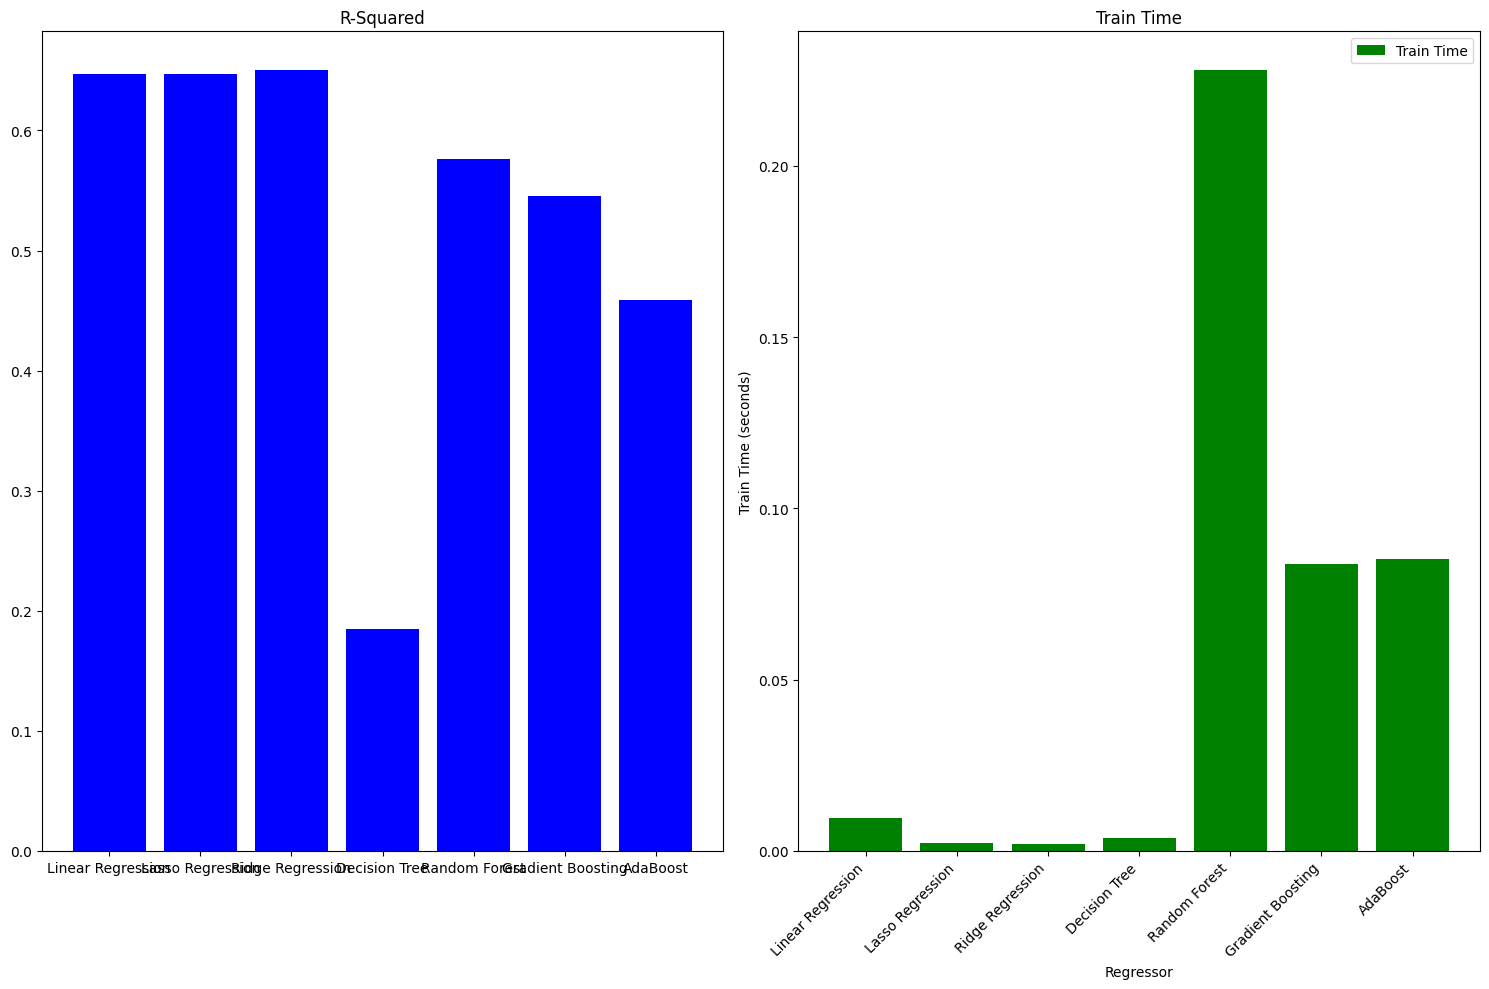

In [56]:
plt.figure(figsize=(15, 10))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.bar(results['Regressors'], results['R-Squared'], color='blue', label='R-Squared')
ax2.bar(results['Regressors'], results['Train Time'], color='green', label='Train Time')

plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.xlabel('Regressor')
plt.ylabel('R-Squared')
ax1.set_title('R-Squared')

plt.ylabel('Train Time (seconds)')
ax2.set_title('Train Time')

plt.legend()
plt.tight_layout()
plt.show()

In [58]:
# displaying the best model as have highest r2_score
best_model=results[results['R-Squared']==results['R-Squared'].max()]
best_model

,Regressors,MSE,R-Squared,Train Time
2,Ridge Regression,1008332791022.37,0.65,0.00


In [19]:
# using of  Ridge Regression as it has high r2_score

from sklearn.linear_model import RidgeCV

# Initialize RidgeCV with a list of alpha values to test
alphas = [0.1, 1.0, 10.0]  # List of alpha values to test
ridge_cv = RidgeCV(alphas=alphas)

# Fit RidgeCV on training data
ridge_cv.fit(X_train, y_train)

# Make predictions on test data
y_pred_cv = ridge_cv.predict(X_test)

# Evaluate performance (e.g., RMSE) of the Ridge Regression
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_cv))

# Print performance metrics
print(f"the Ridge Regression RMSE: {ensemble_rmse}")

the Ridge Regression RMSE: 1235860.7033514671


In [66]:
pd.DataFrame({'prediced':y_pred_cv,'actual':y_test}).head()


,prediced,actual
239,4042785.59,4585000
113,6252198.90,6083000
325,4496468.29,4007500
66,7028312.94,6930000
479,2866324.55,2940000


### Conclusion: Choosing RidgeCV Model over Ensemble Model

Given that both the RidgeCV (Ridge Regression with cross-validation) and the Weighted Ensemble (VotingRegressor) models exhibit identical RMSE values on the test data, the decision can be guided by the following considerations:

- **Identical RMSE**: Both models achieve the same level of prediction accuracy based on RMSE, indicating comparable performance.

- **Model Interpretability**: The RidgeCV model offers straightforward interpretability through explicit coefficients, aiding in understanding feature impact on predictions.

- **Simplicity and Robustness**: RidgeCV is a simpler model compared to the complex ensemble approach of VotingRegressor, which may be more robust and easier to implement.

- **Cross-Validation**: RidgeCV automatically selects the optimal regularization parameter (alpha) through cross-validation, enhancing model robustness and generalization.

**Decision**: Therefore, considering the identical RMSE and advantages in interpretability, simplicity, and cross-validation, the RidgeCV model is recommended over the Weighted Ensemble (VotingRegressor) for this scenario.


In [84]:
X_train.head(3)


,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
542,3620.00,2,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1
496,4000.00,2,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1
484,3040.00,2,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1


In [81]:

# make prediction

x_test=[[400.0,	2,1	,1,0,0,1,1,0,	1	,0,	1	,0	,1	,0,	1,0 ,	0	,0	,1]]
x=pd.DataFrame(x_test,columns=X_train.columns)
y_pred_c=ridge_cv.predict(x)
y_pred_c

array([1800246.79490245])

## saving  Our model to deploy on Streamlit

In [21]:
import pickle
model_save_path='House_price_pred_ridge_cv.pkl'
with open(model_save_path,'wb') as file:
    pickle.dump(ridge_cv,file)

In [89]:
model_load_path='House_price_pred_ridge_cv.pkl'
with open(model_load_path,'rb') as file:
    unpickled_model=pickle.load(file)

In [90]:
y_pred1=unpickled_model.predict(x)
print(int(y_pred1))

1800246
